# Write A Data Science Blog Post
To write my data science blog post, I picked a small dataset from Kaggle where a user uploaded the top 100 track streamed on Spotify.
https://www.kaggle.com/nadintamer/top-spotify-tracks-of-2018

> At the end of each year, Spotify compiles a playlist of the songs streamed most often over the course of that year. This year's playlist (Top Tracks of 2018) includes 100 songs. [...]

In this notebook, we will have a closer look at this dataset.

In [1]:
# Let's load some libraries to get started
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import pi

## 1. Business Understanding

This dataset contains a list of tracks with their features. These tracks were all member of the Spotify 2018 Top 100 Charts.

In this analysis we want to achieve the following goals:

- Get an understanding of the dataset by learning about the characteristcs of the tracks
- Learn what kind of tracks make up the Top 100 playlist
- Can we distill a pattern of features which would nearly guarantee a spot in the Top 100?

These goals will be achieved by answering the following questions:

1. Which artists and what kind of tracks are in the Top 100?
   Here we will take a closer look at the tracks on a more music theoretical level and also one a dataset level.
   We will also take a look at what kind of artists are in the Top 100.
   
2. What does it take to get into the Top 100?
   To answer this question, we will try to understand the importance of the features of each track. 
   We will try to distill a pattern of the tracks in the Top 100.
   
3. Where is the sweet spot of perceivable features to be in the Top 100?
   We will try to recommend a characteristic or quality of a track in order to be more likely a member of the Top 100 charts.


## 2. Data Understanding

The dataset used originates from Kaggle.
https://www.kaggle.com/nadintamer/top-spotify-tracks-of-2018

### Loading

In [2]:
# Let's load the data
spotify_dataset = pd.read_csv('./top2018.csv')
spotify_dataset.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973.0,4.0
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606.0,4.0
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147.0,4.0
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.112,0.439,140.124,221440.0,4.0
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.396,0.350,91.030,217925.0,4.0


We can already tell that this is not a huge dataset in terms of features. But how big is it?

In [3]:
spotify_dataset.shape

(100, 16)

It is a rather small dataset. But we can still work with that!

### Missing Values

In [4]:
spotify_dataset.isnull().sum()

id                  0
name                0
artists             0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

This is like christmas. A complete dataset. Thanks to the author, we do not have to worry about cleaning up the dataset (i.e. imputing etc.)

**We will not need to take care of imputation as we do not have any missing values!**

### Feature description

From the dataset page on Kaggle we can distill some information about the columns:

| Field | Description |
| :------------- | :------------- |
| id | Spotify URI of the song |
| name | Name of the song |
| artists | Artist(s) of the song |
| danceability | Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. |
| energy | Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. |
| key | The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. |
| loudness | The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. |
| mode | Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0. |
| speechiness | Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. |
| acousticness | A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. |
| instrumentalness | Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. |
| liveness | Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. |
| valence | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). |
| tempo | The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. |
| duration_ms | The duration of the track in milliseconds. |
| time_signature | An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). |

### Feature characteristics

In [5]:
spotify_dataset.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00
mean,0.71646,0.659060,5.330000,-5.677640,0.590000,0.115569,0.195701,0.001584,0.158302,0.484443,119.904180,205206.780000,3.98
std,0.13107,0.145067,3.676447,1.777577,0.494311,0.104527,0.220946,0.013449,0.111662,0.206145,28.795984,40007.893404,0.20
min,0.25800,0.296000,0.000000,-10.109000,0.000000,0.023200,0.000282,0.000000,0.021500,0.079600,64.934000,95467.000000,3.00
25%,0.63550,0.562000,1.750000,-6.650500,0.000000,0.045350,0.040225,0.000000,0.094675,0.341000,95.730750,184680.000000,4.00
50%,0.73300,0.678000,5.000000,-5.566500,1.000000,0.074950,0.109000,0.000000,0.118500,0.470500,120.116000,205047.500000,4.00
75%,0.79825,0.772250,8.250000,-4.363750,1.000000,0.137000,0.247750,0.000031,0.170750,0.641500,140.022750,221493.250000,4.00
max,0.96400,0.909000,11.000000,-2.384000,1.000000,0.530000,0.934000,0.134000,0.636000,0.931000,198.075000,417920.000000,5.00


By the table above, we can tell, that all features (of importance) are numeric. However, not all of them are aligned on the same scale.

**Work plan:**
1. Normalize features where not already done on a MinMax Scale (determine whether to do that by looking at the feature description table above)
2. Classify the lower 33% as -1, the middle 33% as 0 and the upper 33% as 1.

Doing so, we will achieve the knowledge of features being relevant and features or the lack thereof not being so relevant.

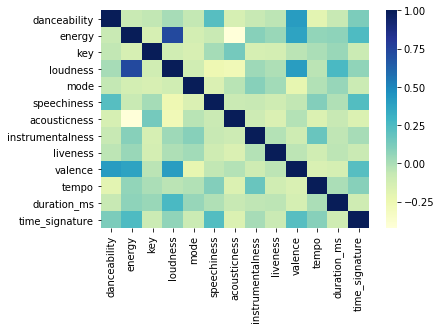

In [6]:
sns.heatmap(spotify_dataset.corr(),cmap="YlGnBu")

At a first glance, we can identify the following:

* The loudness and the energy seem to correlate quite strongly.
* We might want to look into the correlation of (valence, danceability), (valence, energy) and (valence, loudness).

### Exploration

It appears to be that we can segment the features into categories. Some of them are pure metadata of the track such as artist, trackname, and so on, whereas others are more about perceivable features such as danceability, energy and so on. These perceivable features are the ones we will take a closer look, as they will tell you a lot more about the track.

We will now take a closer look at the more technical features and pure metadata in order to determine which ones we could still use for our further analysis.

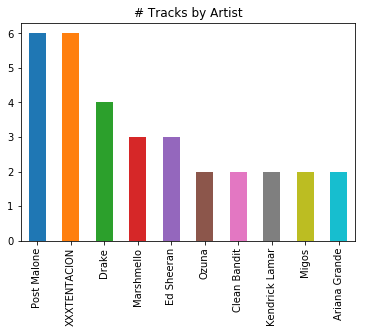

In [7]:
spotify_dataset['artists'].value_counts().head(10).plot.bar(title='# Tracks by Artist')

It appears that a few artists are quite popular and have multiple tracks in the Top 100. Interestingly, I do not know all of them, but this could very well just be me not falling for mainstream music. :-)

I personally am also interested in the technical details of the music in the Top 100. Technical detail means not the perceived features but the more static features such as "mode", "tempo", "duration", "key" and "time_signature".

In [8]:
technical_features = ['mode', 'tempo', 'duration_ms', 'key', 'time_signature']

In [9]:
spotify_dataset['mode_readable'] = spotify_dataset['mode'].map({1: 'Major', 0: 'Minor'})

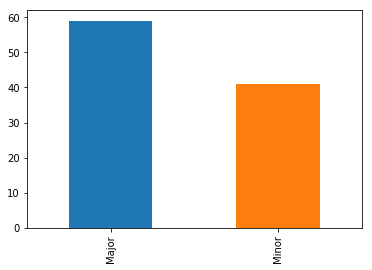

In [10]:
spotify_dataset['mode_readable'].value_counts().plot.bar()

It appears that we are almost equal (major or minor) when it comes to the mode of the tracks.

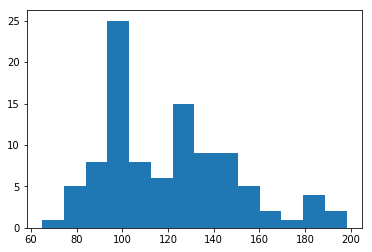

In [11]:
spotify_dataset['tempo'].hist(bins=14, grid=False)

This is a rather interesting plot. As I expected a lot of tracks are rather slow. This was also my impression of the tracks playing in the radio all day. To my understanding, a lot of mainstream tracks are around 100 BPM (speaking of Pop, Hip Hop, RnB). Also electronic music and other more modern form of music is centered around 120-140 BPM.

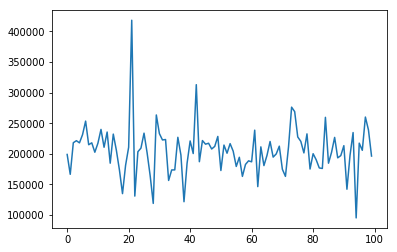

In [12]:
spotify_dataset['duration_ms'].plot()

This plot does not tell us much. We might try a different plot. It might also be helpful to have ms converted to minutes.

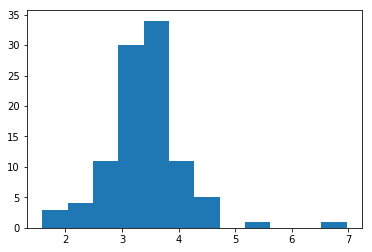

In [13]:
spotify_dataset['duration_min']=spotify_dataset['duration_ms']/60000
spotify_dataset['duration_min'].hist(bins=12, grid=False)

We seem to have most of the tracks being around 3 to 4 minutes in length. This is totally expected.

In [14]:
def map_pitch_class(standard_notation):
    """Function to map key to it is respectful tonal notation.

    Args:
        standard_notation: Standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.

    Returns:
        Tonal notation of the Key / pitch

    """
    tonal_counterparts = ['C','C#','D','D#','E','F','F#','G','G#','A','A#','B']
    return tonal_counterparts[int(standard_notation)]

In [15]:
spotify_dataset['key_tonal'] = spotify_dataset['key'].map(map_pitch_class)

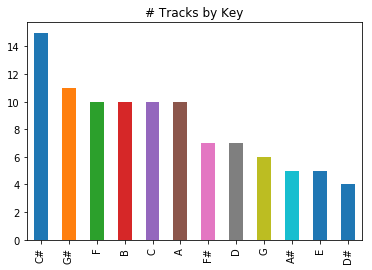

In [16]:
spotify_dataset['key_tonal'].value_counts().plot.bar(title="# Tracks by Key")

In [17]:
spotify_dataset['key_tonal'].value_counts().mean()

8.333333333333334

This is really intersting. We do have a clear winner and a clear looser when it comes to the key a song should be writtne in, but the midfield is quite dense.

In [18]:
spotify_dataset['time_signature_readable'] = spotify_dataset['time_signature'].map({3:'3/4', 4:'4/4', 5:'5/4'})

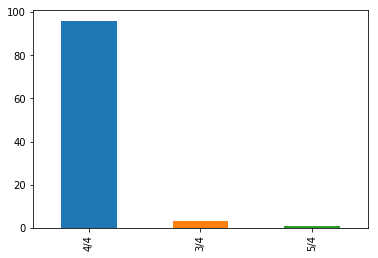

In [19]:
spotify_dataset['time_signature_readable'].value_counts().plot.bar()

I am quite surprised about this. I always thought that 3/4 time signatures in tracks is also used a lot. 

#### Exploration Discussion
We have learned the following:
1. The feature "artist" and the calculated feature track count in the top 100 are not really helpful without further features such as a potential genre.
2. Most of the technical features are either equally distributed or highly skewed, therefore, they are not of much help either.
3. The only feature worth looking into is "Key". Not only are they not evenly distributed or skewed, but also does a Key hold a lot of information about the mood of a track in music theory (common knowledge).

### Categorical Values
It appears there are no categorical values of relevance, apart from the Key. The Key will not be used as a feature of the analysis. It will only be used to filter on the analysis. Other categorical features such as mode, will not be used at all.

## 3. Data Preparation

### Feature inclusion/exclusion
We will drop the following features from our analysis (not physically drop but just not include in our results):
1. id, name, artist: These features do not tell us much. We could run interesting queries if we would also have additional features such as genre. But without extra data the three features are more or less worthless. We will not sideload additional data.
2. time_signature, duration, mode, tempo: These features are either highly skewed or equally distributed. Hence, we cannot gain a lot of knowledge from them.

We will continue to use the following technical feature(s):
* Key

### Data handling
In this section we will take care of the perceivable features and classify them as described before. Were applicable we will normalize the features.

In [20]:
perceivable_features = ['danceability', 'energy', 'loudness', 'speechiness', 
                      'acousticness', 'instrumentalness', 'liveness', 'valence']

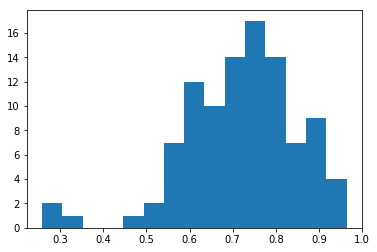

In [21]:
spotify_dataset['danceability'].hist(bins=15, grid=False)

In [22]:
spotify_dataset['danceability'].describe()

count    100.00000
mean       0.71646
std        0.13107
min        0.25800
25%        0.63550
50%        0.73300
75%        0.79825
max        0.96400
Name: danceability, dtype: float64

Almost all the track in the Top 100 are rather danceable (>50%). To make the term dancability a bit more understandable, we will introduce a new feature.

In [23]:
def map_danceability(score):
    """Function to map danceability score to one of the predefined classes [-1, 0, 1]

    Args:
        score: The score to classify. Expected to be between 0 and 1.

    Returns:
        Class of the score. Either -1, 0 or 1.

    """
    if score >= 0.66:
        return 1
    elif 0.33 <= score < 0.66:
        return 0
    else:
        return -1

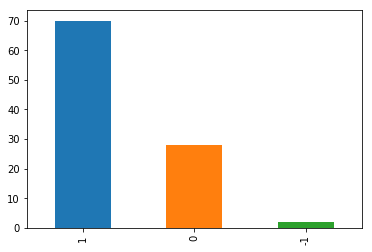

In [24]:
spotify_dataset['danceability_class'] = spotify_dataset['danceability'].map(map_danceability)
spotify_dataset['danceability_class'].value_counts().plot.bar()

It seems to be easier to categorize the features in a few buckets. Let's do that with all or most of the features.

In [25]:
def map_energy(score):
    """Function to map energy score to one of the predefined classes [-1, 0, 1]

    Args:
        score: The score to classify. Expected to be between 0 and 1.

    Returns:
        Class of the score. Either -1, 0 or 1.

    """
    if score >= 0.66:
        return 1
    elif 0.33 <= score < 0.66:
        return 0
    else:
        return -1

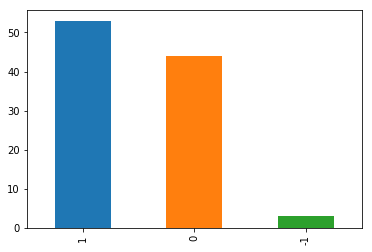

In [26]:
spotify_dataset['energy_class'] = spotify_dataset['energy'].map(map_energy)
spotify_dataset['energy_class'].value_counts().plot.bar()

As we already know, energy and danceability correlate. The plots above do support this to some degree.

In [27]:
spotify_dataset['loudness'].describe()

count    100.000000
mean      -5.677640
std        1.777577
min      -10.109000
25%       -6.650500
50%       -5.566500
75%       -4.363750
max       -2.384000
Name: loudness, dtype: float64

We should probably normalize the data here. We use minmax normalization and invert the scale as for dB 0 is the max value and -INF the min value.

In [28]:
spotify_dataset['loudness_normalized'] = (
    (spotify_dataset['loudness']-spotify_dataset['loudness'].min())
    /(spotify_dataset['loudness'].max()-spotify_dataset['loudness'].min()))

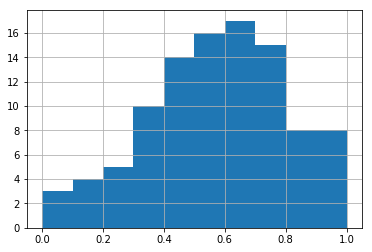

In [29]:
spotify_dataset['loudness_normalized'].hist()

In [30]:
def map_loudness(score):
    """Function to map loudness score to one of the predefined classes [-1, 0, 1]

    Args:
        score: The score to classify. Expected to be between 0 and 1.

    Returns:
        Class of the score. Either -1, 0 or 1.

    """
    if score >= 0.66:
        return 1
    elif 0.33 <= score < 0.66:
        return 0
    else:
        return -1

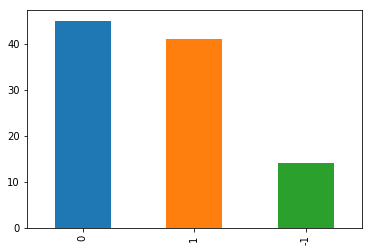

In [31]:
spotify_dataset['loudness_class'] = spotify_dataset['loudness_normalized'].map(map_loudness)
spotify_dataset['loudness_class'].value_counts().plot.bar()

Again, we see a similar picture as before. This is expected. 

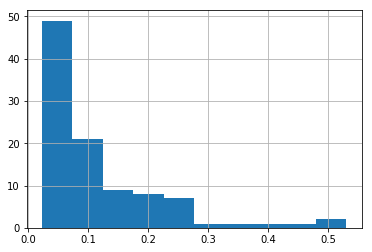

In [32]:
spotify_dataset['speechiness'].hist()

The speechiness does look completely different. By consulting the metadata, we can also encode this feature.

> Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

In [33]:
def map_speechiness(score):
    """Function to map speechiness score to one of the predefined classes [-1, 0, 1]

    Args:
        score: The score to classify. Expected to be between 0 and 1.

    Returns:
        Class of the score. Either -1, 0 or 1.

    """
    if score >= 0.66:
        return 1
    elif 0.33 <= score < 0.66:
        return 0
    else:
        return -1

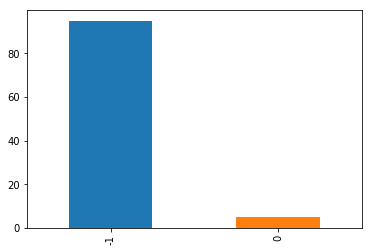

In [34]:
spotify_dataset['speechiness_class'] = spotify_dataset['speechiness'].map(map_speechiness)
spotify_dataset['speechiness_class'].value_counts().plot.bar()

This is quite an interesting plot. Compared to previous encodings, we used predefined limits for speechiness. It is hard to believe that most of the tracks are "accoustic" tracks in the Top 100. This needs some further analysis.

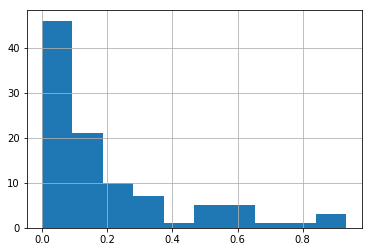

In [35]:
spotify_dataset['acousticness'].hist()

The acousticness histogram seems to resemble the one from the speechiness feature. Which would support what we see above in the 'speechiness_class' plot.

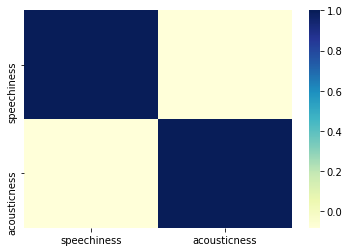

In [36]:
sns.heatmap(spotify_dataset.filter(items=['speechiness','acousticness']).corr(),cmap="YlGnBu")

I cannot yet completely interpret this plot.

In [37]:
def map_acousticness(score):
    """Function to map acousticness score to one of the predefined classes [-1, 0, 1]

    Args:
        score: The score to classify. Expected to be between 0 and 1.

    Returns:
        Class of the score. Either -1, 0 or 1.

    """
    if score >= 0.66:
        return 1
    elif 0.33 <= score < 0.66:
        return 0
    else:
        return -1

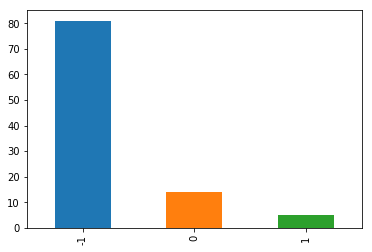

In [38]:
spotify_dataset['acousticness_class'] = spotify_dataset['acousticness'].map(map_acousticness)
spotify_dataset['acousticness_class'].value_counts().plot.bar()

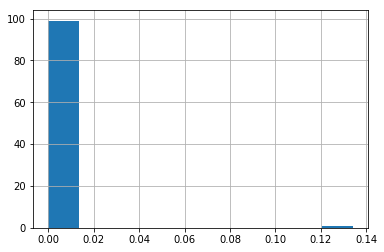

In [39]:
spotify_dataset['instrumentalness'].hist()

This feature is really skewed. However,, it also indicates that, by looking at the X-axis, no track is instrumental. Which also means my interpretation of 'speechiness' above is not 100% correct.

In [40]:
def map_instrumentalness(score):
    """Function to map instrumentalness score to one of the predefined classes [-1, 0, 1]

    Args:
        score: The score to classify. Expected to be between 0 and 1.

    Returns:
        Class of the score. Either -1, 0 or 1.

    """
    if score >= 0.66:
        return 1
    elif 0.33 <= score < 0.66:
        return 0
    else:
        return -1

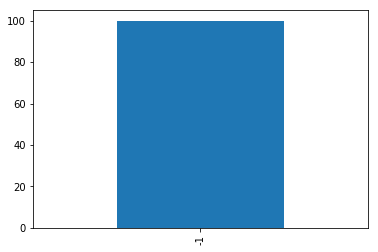

In [41]:
spotify_dataset['instrumentalness_class'] = spotify_dataset['instrumentalness'].map(map_instrumentalness)
spotify_dataset['instrumentalness_class'].value_counts().plot.bar()

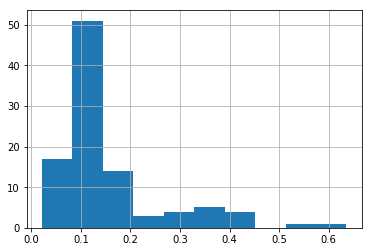

In [42]:
spotify_dataset['liveness'].hist()

In [43]:
def map_liveness(score):
    """Function to map liveness score to one of the predefined classes [-1, 0, 1]

    Args:
        score: The score to classify. Expected to be between 0 and 1.

    Returns:
        Class of the score. Either -1, 0 or 1.

    """
    if score >= 0.66:
        return 1
    elif 0.33 <= score < 0.66:
        return 0
    else:
        return -1

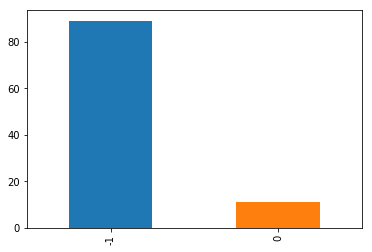

In [44]:
spotify_dataset['liveness_class'] = spotify_dataset['liveness'].map(map_liveness)
spotify_dataset['liveness_class'].value_counts().plot.bar()

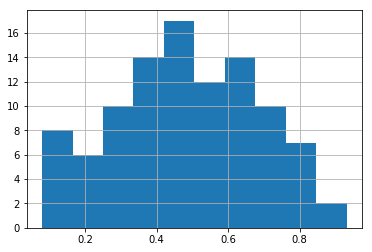

In [45]:
spotify_dataset['valence'].hist()

In [46]:
def map_valence(score):
    """Function to map valence score to one of the predefined classes [-1, 0, 1]

    Args:
        score: The score to classify. Expected to be between 0 and 1.

    Returns:
        Class of the score. Either -1, 0 or 1.

    """
    if score >= 0.66:
        return 1
    elif 0.33 <= score < 0.66:
        return 0
    else:
        return -1

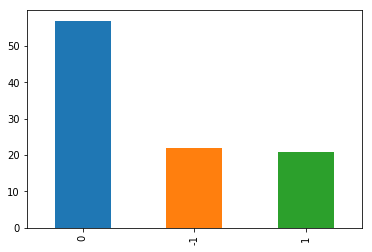

In [47]:
spotify_dataset['valence_class'] = spotify_dataset['valence'].map(map_valence)
spotify_dataset['valence_class'].value_counts().plot.bar()

We have now reencoded all the features as described in our initial plan.

## 4. Modelling

Just for fun we will take a look at correlation again. By introducing reorganizing the features, we might be able to better recognize correlations.

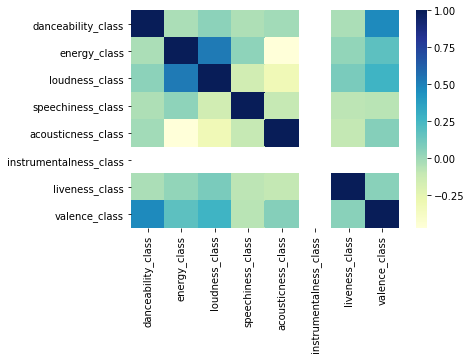

In [48]:
class_features = []
for column in spotify_dataset.columns:
    if "_class" in column:
        class_features.append(column)
sns.heatmap(spotify_dataset.filter(items=class_features).corr(),cmap="YlGnBu")

We can now see a little better picture of what kind of tracks we have in the Top 100. The reencoding helped a little, to make the correlation matrix a little more understandable. For instance, we can tell that the instrumentalness feature does not influence the Top 100 as there are not any instrumental tracks.

## 5. Evaluation / Results

### Question 1: Which artists and what kind of tracks are in the Top 100?
We can tell a few artists being more popular in the Top 100 as they have multiple tracks in there. However, without additional features such as genre, we cannot distill much more than that. The only feature a bit more relevant is the "Key" feature. This one tells us quite a lot. The key feature defines a tracks mood in music theory. Therefore, we can tell that more "up beat" tracks are more prominent in the Top 100 than rather "sad" tracks.

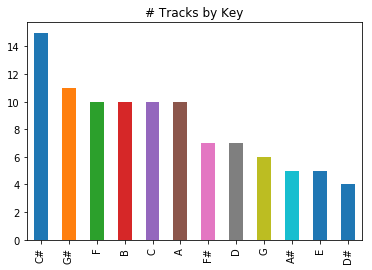

In [49]:
spotify_dataset['key_tonal'].value_counts().plot.bar(title="# Tracks by Key")

### Question 2: What does it take to get into the Top 100?
In order to answer this question, we reencoded all the perceivable features to have them available in a bit more graspable way.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B7614F6518>,
      dtype=object)

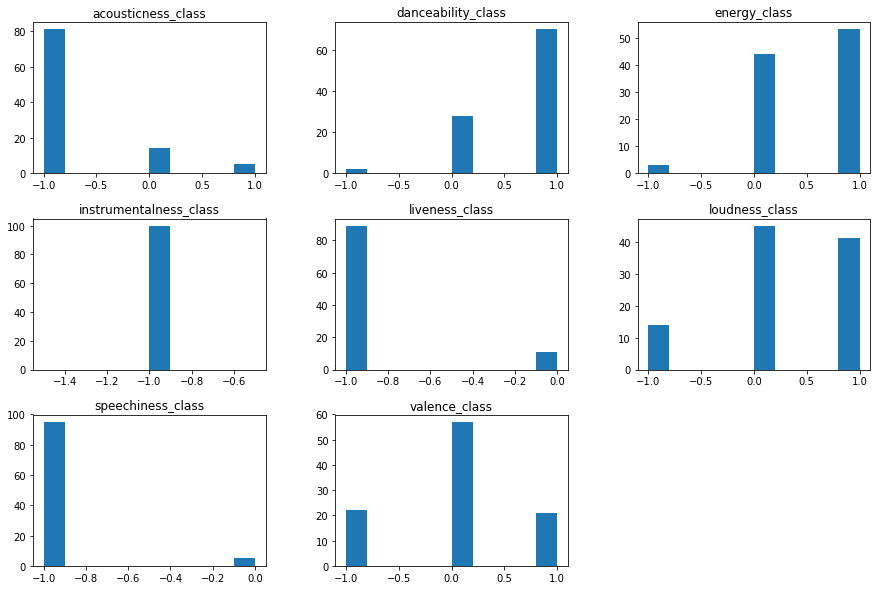

In [50]:
spotify_dataset.filter(items=class_features).hist(figsize=(15,10), grid=False)

We can tell from the plots above that the following features are more important for a track to be in the Top 100:

* Acoustic
* Live
* Speechy

This we can tell by looking at the plots which only (or mostly) are right balanced. 
Since negative information is also information, we can further tell that features such as,

* Acousticness
* Instrumentalness
* Liveness
* Speechiness

are not really present in the Top 100 which means that tracks shall not be strong in these features.


### Question 3: Where is the sweet spot of perceivable features to be in the Top 100? 
In order to answer this question, we have to figure out which features are most prominent. We can achieve this by calculating the categorisation which appears the most for each feature. The result can then be plotted on a spider plot.

Thanks to our reclassification we can tell the following:
* A 1 being the most present classification will tell us that this feature is really important to be present in a track.
* A 0 being the most present classification will tell us that this feature is quite important to be present in a track.
* A -1 being the most present classification will tell us that this feature not be present in a track.

In [51]:
def plot_spider(df, categories, title=''):
    """Function to plot a spider/radar chart

    Args:
        df: The data frame to plot. Requires to be in th following format format:
            | feature1 | feature2 | ... | featureN |
          # | 0        | 1        | ... | -1       |
          Note: Only one row is allowed to the dataframe.
        categories: The categories, i.e. names of each feature.
        title: The title to be displayed over the plot. Default: ''

    Returns:
        Nothing (however, plots the radar chart directly)

    """
    # credits to: https://python-graph-gallery.com/390-basic-radar-chart/
    
    categories=list([x.replace('_class','') for x in categories])
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values=df.loc[0].values.flatten().tolist()
    values += values[:1]
    values

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    plt.figure(figsize=(8,8))
    ax = plt.subplot(111, polar=True)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='black', size=15)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([-1,0,1], ["-1","0","1"], color="grey", size=10)
    plt.ylim(-1,1)
    
    # Plot title
    plt.title(title, size=20)

    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')

    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)

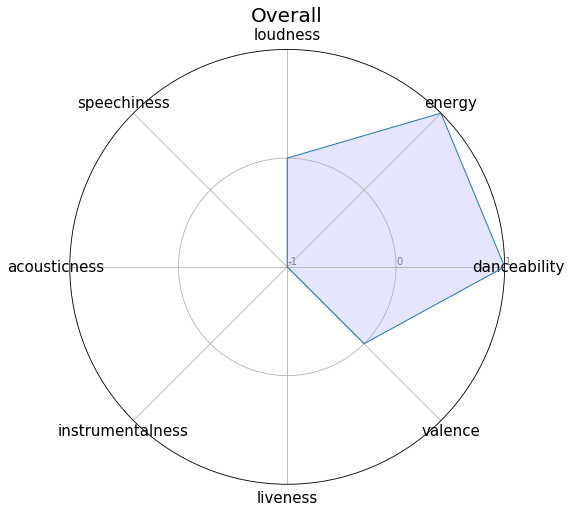

In [52]:
# Overall
characteristics = spotify_dataset.filter(items=class_features).apply(pd.value_counts).idxmax(axis=0)
plot_spider(pd.DataFrame(characteristics).T, list(characteristics.index), 'Overall')

On the spider plot above we can see that a energetic and dancable track is rather destined to be in the Top 100.

Just for fun, let's have a look at the feature importance filtered towards the Key feature.

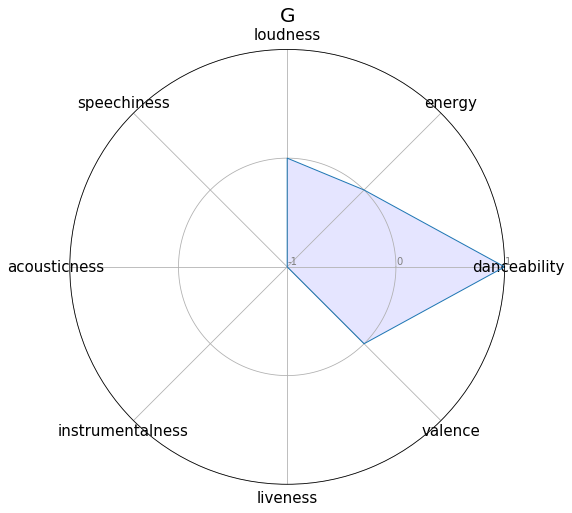

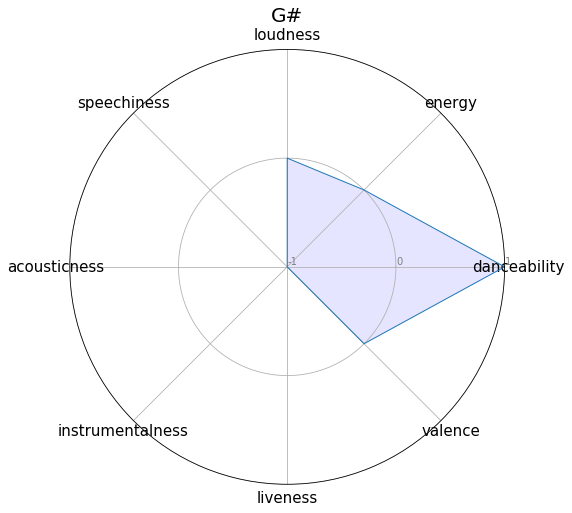

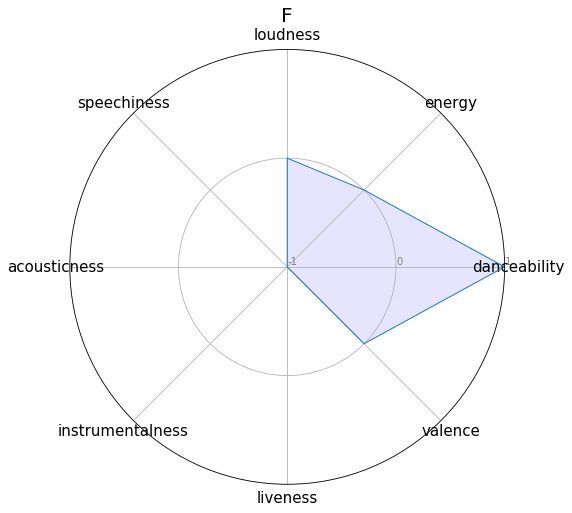

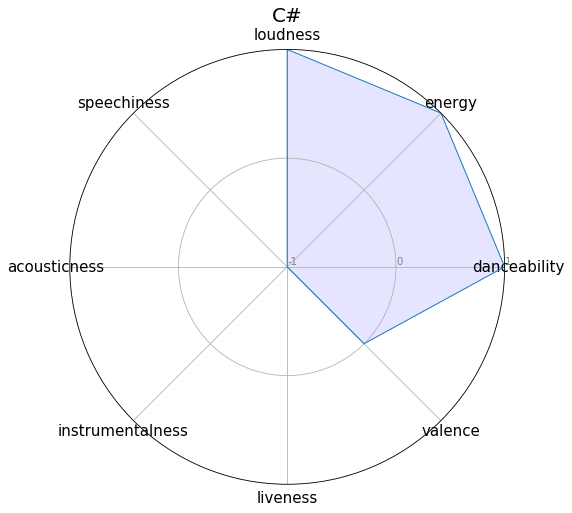

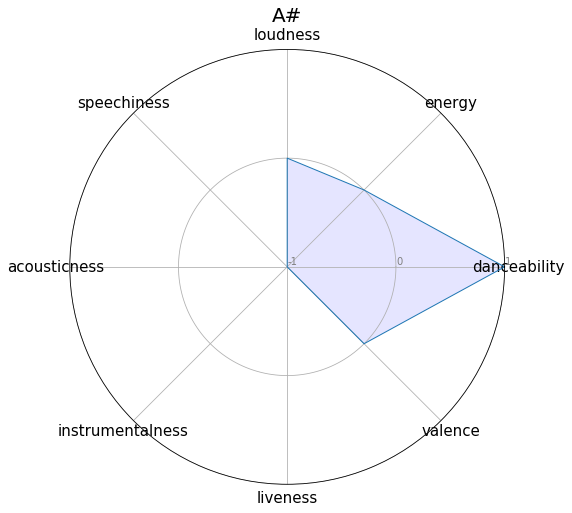

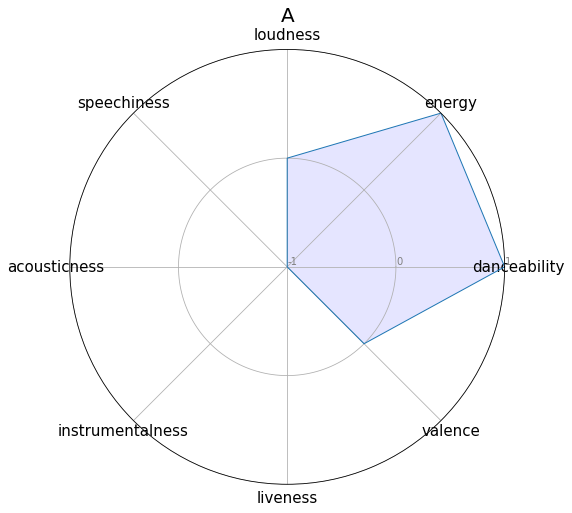

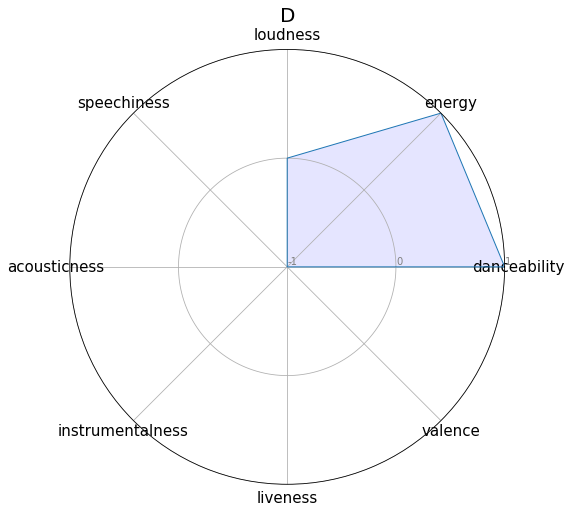

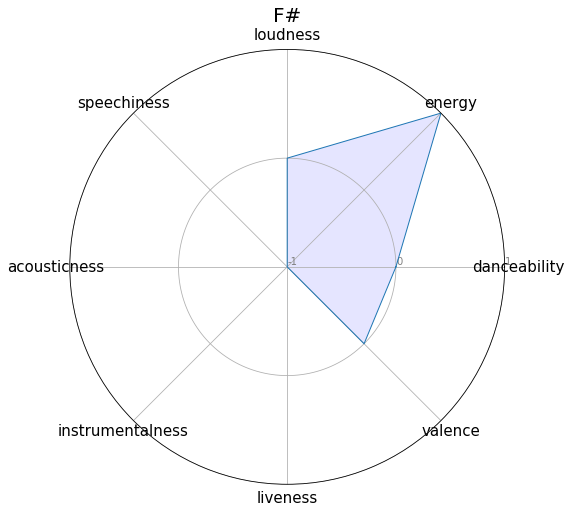

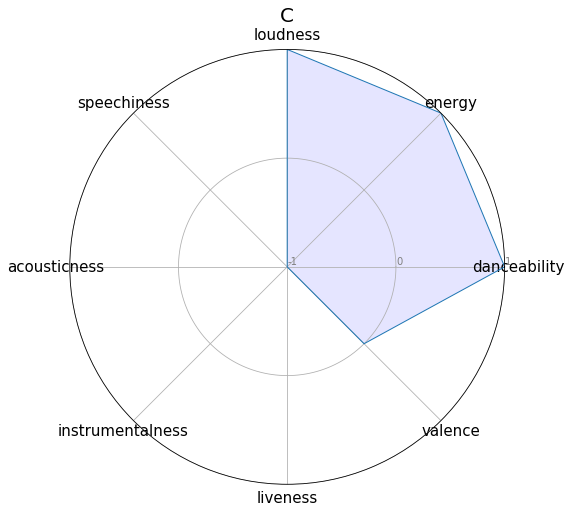

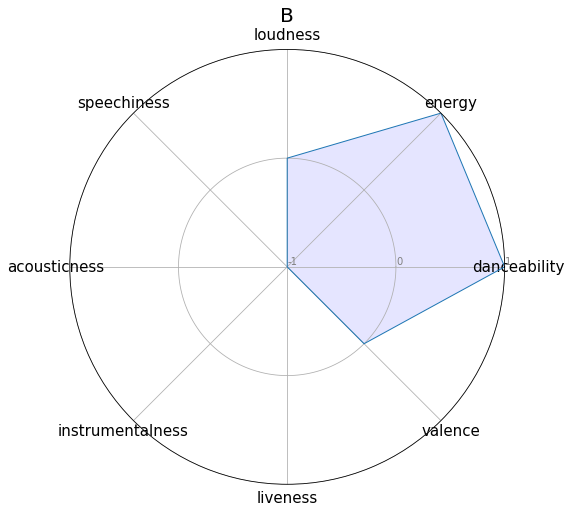

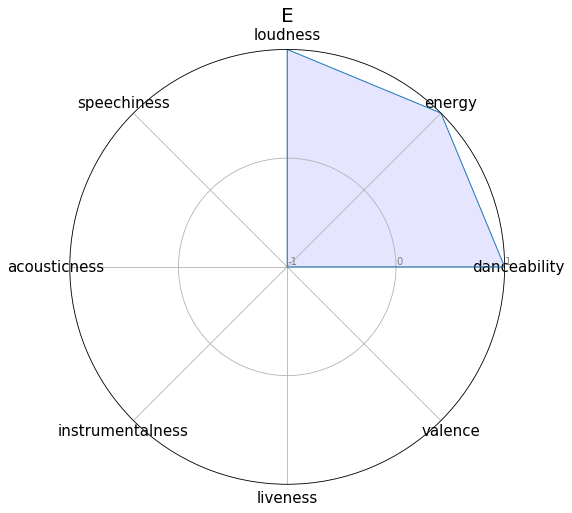

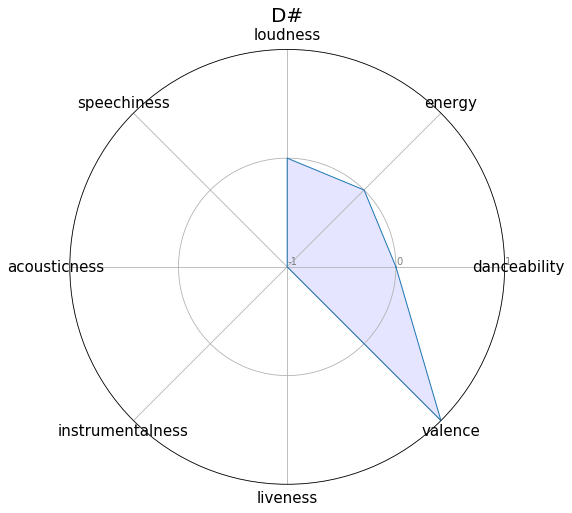

In [53]:
for key in list(spotify_dataset['key_tonal'].unique()):
    df = spotify_dataset.loc[spotify_dataset['key_tonal'] == key]
    characteristics = df.filter(items=class_features).apply(pd.value_counts).idxmax(axis=0)
    plot_spider(pd.DataFrame(characteristics).T, list(characteristics.index), key)

## 6. Deployment
The above code can be found on Github: https://github.com/nsiicm0/Spotify-2018-Top-100-Analysis

A written interpretation can be found on Medium: https://medium.com/@nsiicm0/how-to-get-into-spotifys-annual-top-100-list-f81df826cb9f